In [77]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Load saved embeddings:

In [78]:
from gensim.models import KeyedVectors
wv_from_text = KeyedVectors.load_word2vec_format('../emb/dd6.emb', binary=False)

In [79]:
index_to_key = {v: k for k, v in wv_from_text.key_to_index.items()}

Convert them into a dataframe (not really needed though):

In [80]:
df = pd.DataFrame(wv_from_text.vectors, columns = ['d' + str(i) for i in range(wv_from_text.vectors.shape[1])])

In [81]:
emb_tsne = TSNE(n_components=2).fit_transform(wv_from_text.vectors)

Show the embbeddings colored based on the labels:

In [82]:
color_df = pd.read_csv('../raw_data/DD6/DD6.node_labels')
color_dict = {color_df['node'].iloc[i]: color_df['label'].iloc[i] for i in range(color_df.shape[0])}

In [83]:
colors = np.array([color_dict[int(index_to_key[i])] for i in range(color_df.shape[0])])

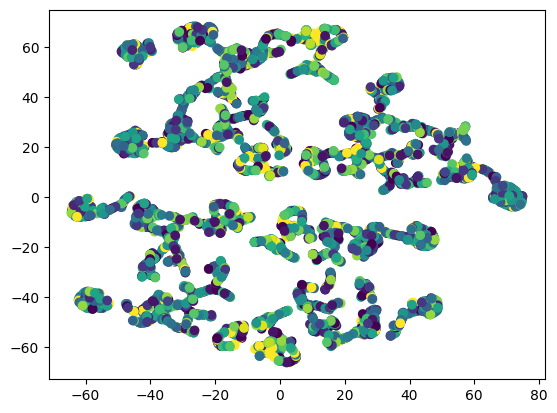

In [84]:
plt.figure()
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=colors)
plt.show()